Stock Price Prediction Model using Python and Machine Learning - Joseph Kim (8-1-2024): This program uses an LSTM artificial recurrent neural network to predcit the closing stock price of a corporation using the past 60 day stock price. 

In [94]:
# Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [95]:
# look at several stocks. The safest and most interesting stocks right now: AAPL, NKE, GOOGL, NVDA
# other interesting stocks to look at: medtronic (MDT)

df = yf.download('AAPL', start='2014-01-01', end='2024-7-31')

df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,19.845715,19.893929,19.715000,19.754642,17.273224,234684800
2014-01-03,19.745001,19.775000,19.301071,19.320715,16.893797,392467600
2014-01-06,19.194643,19.528570,19.057142,19.426071,16.985929,412610800
2014-01-07,19.440001,19.498571,19.211430,19.287144,16.864443,317209200
2014-01-08,19.243214,19.484285,19.238930,19.409286,16.971249,258529600
...,...,...,...,...,...,...
2024-07-24,224.000000,224.800003,217.130005,218.539993,218.539993,61777600
2024-07-25,218.929993,220.850006,214.619995,217.490005,217.490005,51391200
2024-07-26,218.699997,219.490005,216.009995,217.960007,217.960007,41601300


In [96]:
df.shape

(2661, 6)

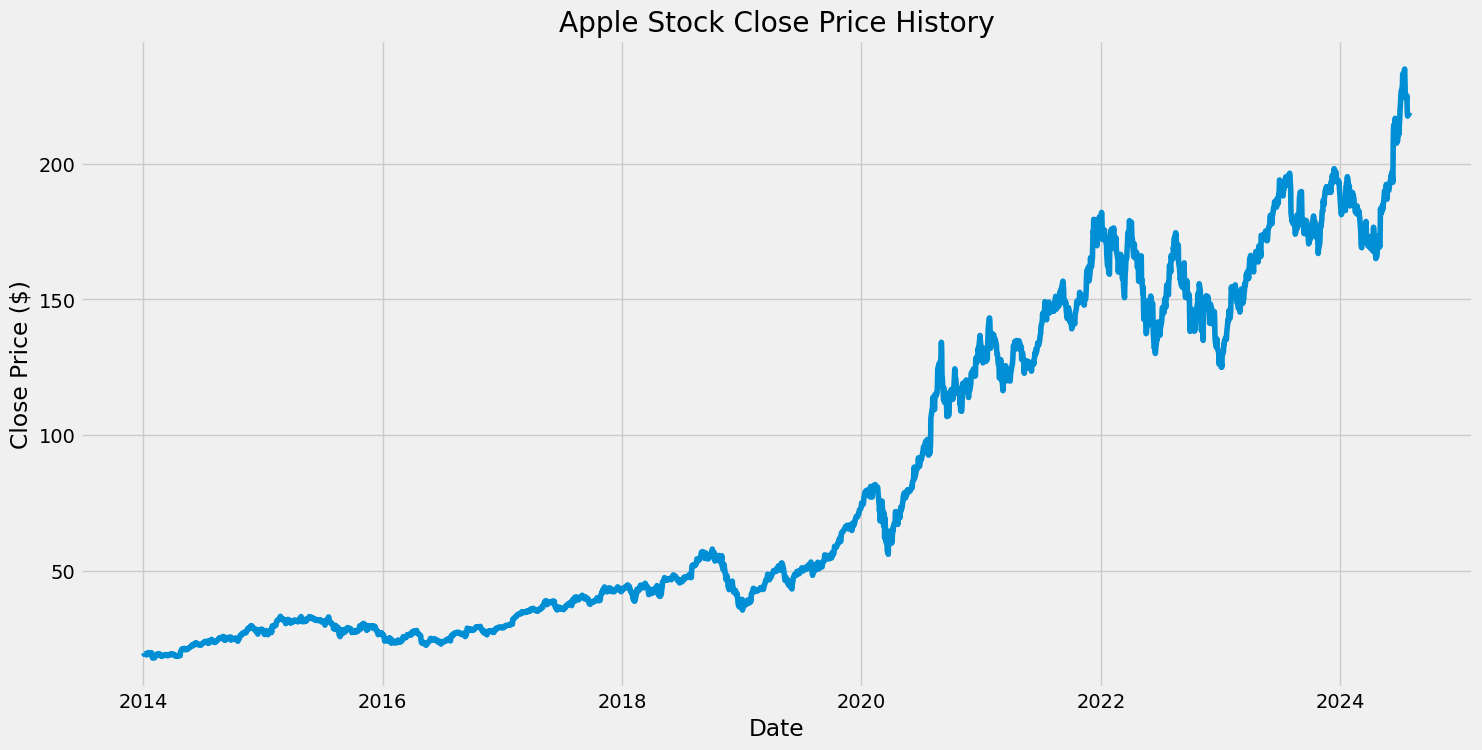

In [97]:
plt.figure(figsize=(16, 8))
plt.title('Apple Stock Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.show()

In [98]:
# Creating a numpy array from the dataframe
data = df.filter(['Close'])
dataset = data.values
dataset


training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2129

Preprocessing the dataset: Scaling and Encoding

In [99]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00878163],
       [0.0067817 ],
       [0.00726728],
       ...,
       [0.92229366],
       [0.92358415],
       [0.92616513]])

In [100]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60:i, 0])
    y_train.append(train_data[i, 0])
    # print the first iteration
    #if i <= 60:
    #    print(X_train)
    #    print(y_train)


In [101]:
# convert training datasets into numpy arrays (2 dimensional)
x_train, y_train = np.array(x_train), np.array(y_train)
x_train.shape

(2069, 60)

In [102]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # convert to three dimensions

# Create the ANN
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Joseph\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [103]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [104]:
model.fit(x_train, y_train, batch_size=1, epochs=1) # Train the model

2069/2069 ━━━━━━━━━━━━━━━━━━━━ 59s 25ms/step - loss: 0.0027


In [105]:
# Create the testing dataset, through a new array containing scaled values
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [106]:
x_test = np.array(x_test)
#X_test.shape

In [107]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [108]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


In [109]:
rmse = np.sqrt(((predictions - y_test) ** 2).mean())
rmse

7.598573402801806

C:\Users\Joseph\AppData\Local\Temp\ipykernel_356\1799547468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


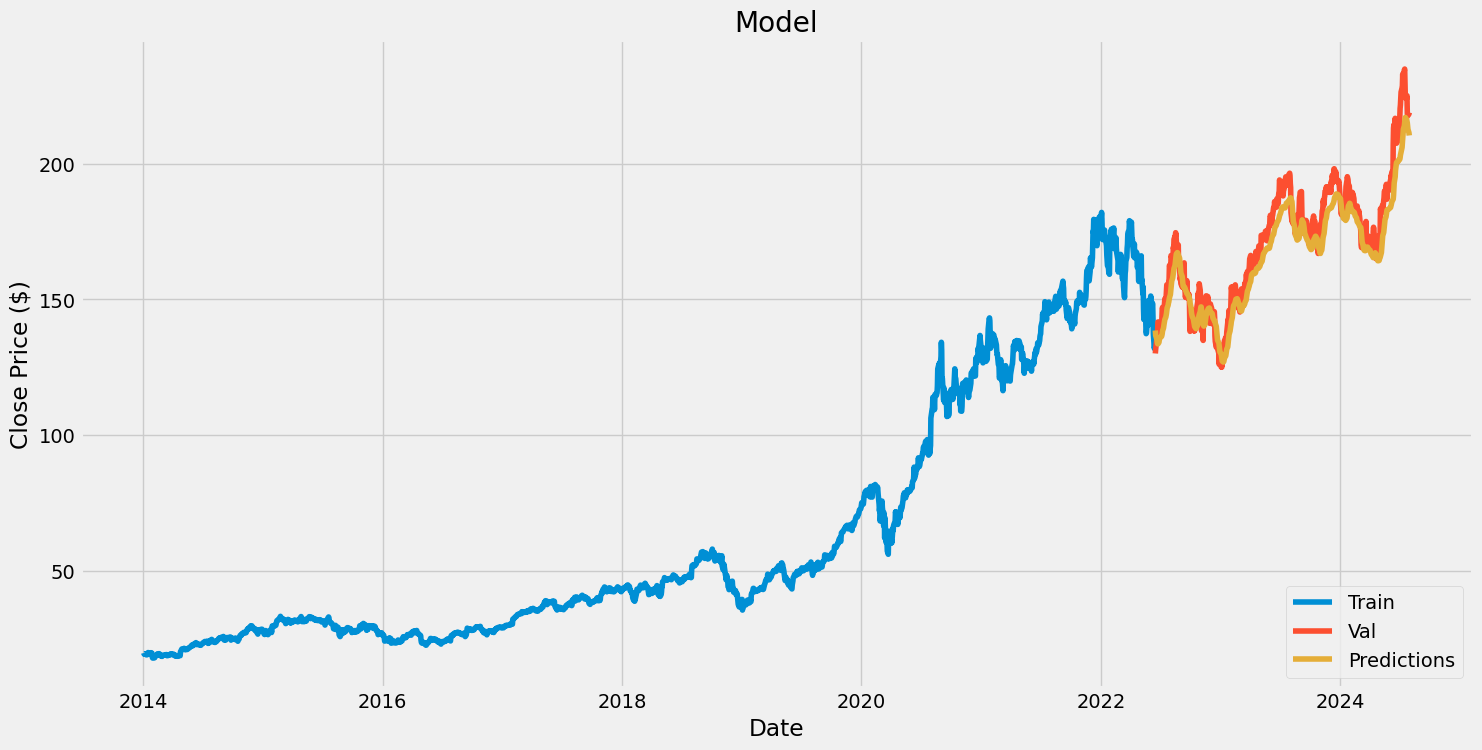

In [110]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [111]:
valid

,Close,Predictions
Date,,
2022-06-16,130.059998,138.530182
2022-06-17,131.559998,136.736786
2022-06-21,135.869995,135.164261
2022-06-22,135.350006,134.220779
2022-06-23,138.270004,133.642395
...,...,...
2024-07-24,218.539993,214.946686
2024-07-25,217.490005,213.841492
2024-07-26,217.960007,212.568390


In [112]:
quote = yf.download('AAPL', start='2014-01-01', end='2024-07-31')
new_df = quote.filter(['Close'])
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[209.56352]]


In [113]:
quote2 = yf.download('AAPL', start='2024-08-01', end='2024-08-02')
print(quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-08-01    218.360001
Name: Close, dtype: float64
